<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-09-23,26578.556641,26634.185547,26520.519531,26579.390625,26579.390625,7404700301
2023-09-24,26579.373047,26716.058594,26221.050781,26256.826172,26256.826172,8192867686
2023-09-25,26253.775391,26421.507812,26011.468750,26298.480469,26298.480469,11997833257


In [5]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error


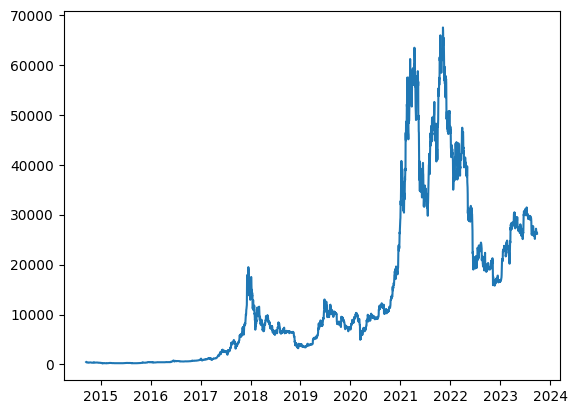

In [6]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [7]:
#Train test split

row = int(len(df)*0.9)
train_data = list(df[0:row]['Adj Close'])
test_data = list(df[row:]['Adj Close'])

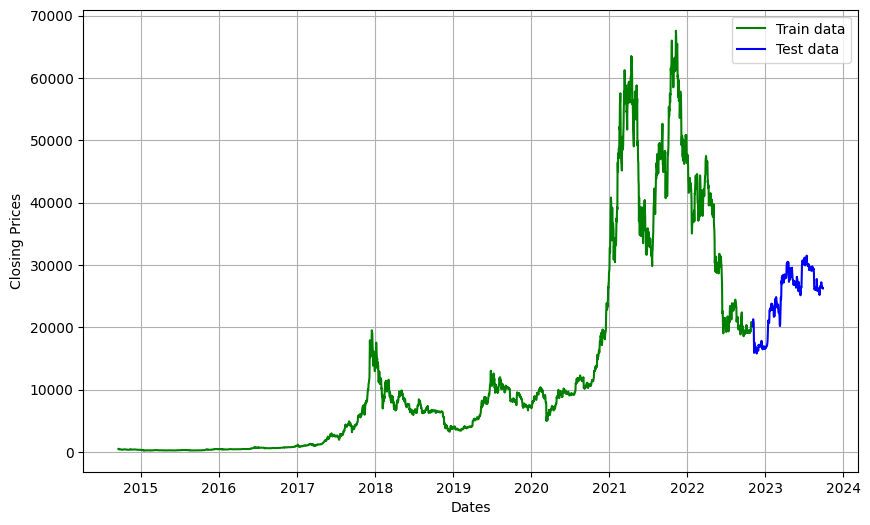

In [8]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df.index[0:row],train_data,'green',label='Train data')
plt.plot(df.index[row:],test_data,'blue',label='Test data')
plt.legend()

In [9]:
model_pred = []
n_test = len(test_data)

In [10]:
for i in range(n_test):
  model = ARIMA(train_data,order=(4,1,0))
  model_fit = model.fit()
  out = model_fit.forecast()
  y_pred = out[0]
  model_pred.append(y_pred)
  test_val = test_data[i]
  train_data.append(test_val)

In [11]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3297
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -26621.767
Date:                Wed, 27 Sep 2023   AIC                          53253.535
Time:                        20:39:27   BIC                          53284.037
Sample:                             0   HQIC                         53264.454
                               - 3297                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0249      0.009     -2.756      0.006      -0.043      -0.007
ar.L2          0.0082      0.009      0.947      0.344      -0.009       0.025
ar.L3          0.0198      0.009      2.124      0.0

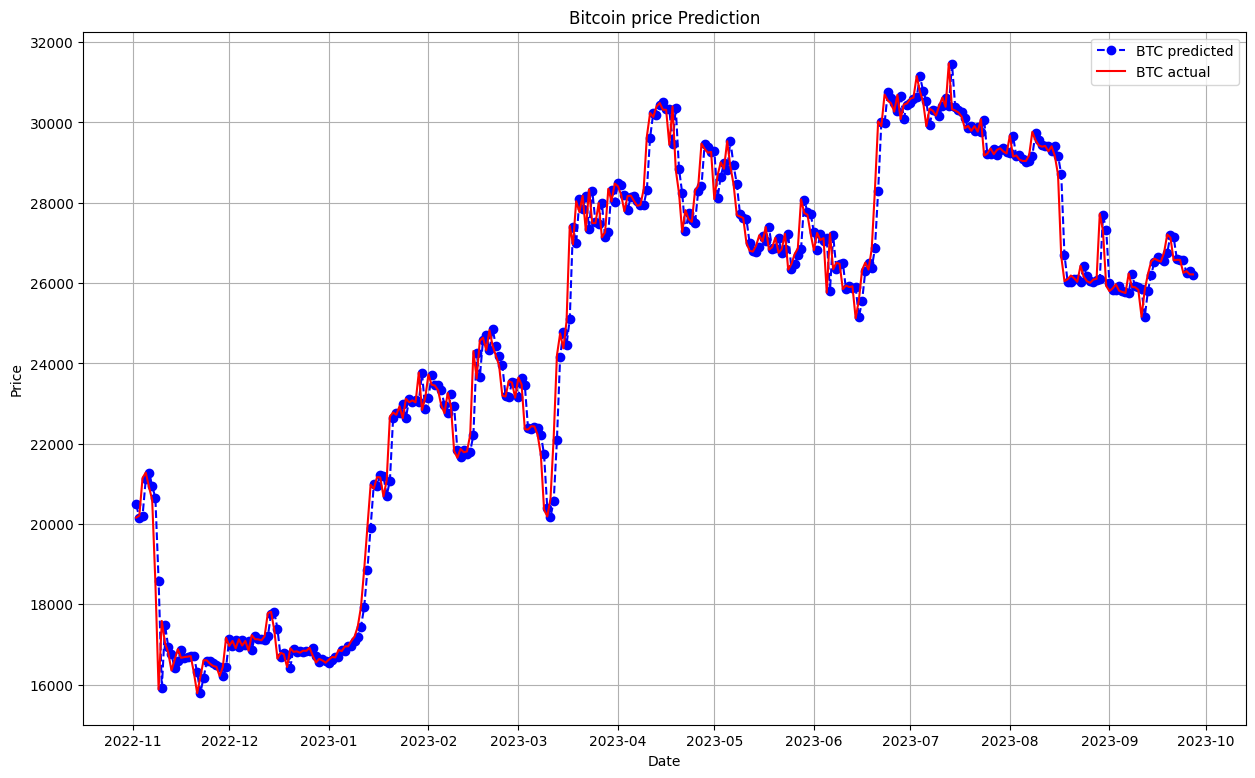

In [12]:
plt.figure(figsize = (15,9))
plt.grid(True)
data_range = df.index[row:]
plt.plot(data_range,model_pred,color='blue',marker='o',linestyle='dashed',label = 'BTC predicted')
plt.plot(data_range,test_data,color='red',label = 'BTC actual')
plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(test_data,model_pred))

mae = mean_absolute_error(test_data,model_pred)

r_squared = r2_score(test_data,model_pred)

acc = mean_absolute_percentage_error(test_data,model_pred)
acc = (1-acc)*100
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared (R2)' , 'Accuracy'],
    'Value': [rmse, mae, r_squared, acc]
})

print(metrics_df)

           Metric       Value
0            RMSE  578.934235
1             MAE  375.358360
2  R-squared (R2)    0.984550
3        Accuracy   98.443953
